# **Статистический анализ данных сервиса аренды самокатов GoFast**

Для работы представлены данные от сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. 

**Цель исследования**:

В ходе исследования предстоит изучить и обработать представленные данные, провести исследовательский анализ данных, проверить некоторые гипотезы о времени поездок, расстоянии, помесячной выручке и влиянии технических обновлений, определить минимальное число промокодов для достижения плана и построить график распределения для оценки открытия push-уведомлений. Далее необходимо сделать выводы по поставленным вопросам, что может поспособствовать росту бизнеса.  

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.  
   
**Представленная информация**:  

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в файлы.

1. Пользователи — `users_go.csv`:

- `user_id` — уникальный идентификатор пользователя; 
- `name` — имя пользователя;
- `age` — возраст;
- `city` — город;
- `subscription_type` — тип подписки (free, ultra).  

2. Поездки — `rides_go.csv`:

- `user_id` — уникальный идентификатор пользователя;
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах);
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
- `date` — дата совершения поездки.  

3. Подписки — `subscriptions_go.csv`:

- `subscription_type` — тип подписки;
- `minute_price` — стоимость одной минуты поездки по данной подписке;
- `start_ride_price` — стоимость начала поездки;
- `subscription_fee` — стоимость ежемесячного платежа.  

**Этапы исследования**:  

   Шаг 0. Загрузка и настройка библиотек
   
1  Шаг 1. Загрузка данных

2  Шаг 2. Предобработка данных  
- 2.1  Корректировка типов данных столбцов  
- 2.2  Добавление столбцов  
- 2.3  Изучение и обработка пропущенных значений и дубликатов

3  Шаг 3. Исследовательский анализ данных  
- 3.1  Частота встречаемости городов  
- 3.2  Соотношение пользователей с подпиской и без нее  
- 3.3  Возраст пользователей  
- 3.4  Расстояние, которое пользователь преодолел за одну поездку  
- 3.5  Продолжительность поездок  

4  Шаг 4. Объединение данных
- 4.1  Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()
- 4.2  Создание двух датафреймов из датафрейма, созданного на предыдущем этапе:  
- с данными о пользователях без подписки;  
- с данными о пользователях с подпиской;  
- 4.3  Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий 

5  Шаг 5. Подсчёт выручки  
- 5.1  Создание датафрейма с агрегированными данными о поездках  
- 5.2  Добавление столбца с помесячной выручкой, которую принес каждый пользователь

6  Шаг 6. Проверка гипотез  
- 6.1  Тратят ли пользователи с подпиской больше времени на поездки?
- 6.2  Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- 6.3  Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?   Сделать выводы  
- 6.4  Каким тестом проверить гипотезу о значимом снижении количества пользовательских обращений в техподдержку после обновления сервиса, с которым взаимодействует мобильное приложение? 

7  Шаг 7. Распределения 

8  Выводы 


  


**Шаг 0. Загрузка и настройка библиотек**

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

#### Шаг 1. Загрузка данных

In [274]:
# Считываем файлы
data_users = pd.read_csv('/datasets/users_go.csv') 
data_rides = pd.read_csv('/datasets/rides_go.csv') 
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') 


<u>Датафрейм `Пользователи` - `data_users`<u>

In [275]:
# Смотрим первые строки
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [276]:
# Выведем основную информацию о датафрейме `Пользователи` - `data_users` с помощью метода info()
data_users.info()

# Применим также метод describe()
data_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


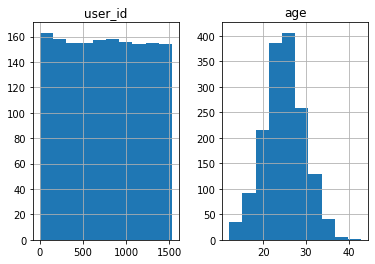

In [277]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике
data_users.hist();

Мы видим, что датафрейм `data_users` состоит из 5 столбцов, в которых находятся данные с типами object и int64. Общее количество индексов в таблице составляет 1 565, и такие же количества ненулевых значений во всех столбцах, поэтому предположим, что данные не содержат пропусков. Также не наблюдается особых выбросов. 
Названия столбцов соответствуют стилю `snake_case`.

В столбце `user_id` максимальное значение указано как 1 534 при наличии 1 565 строк. Возможно, присутствуют дубликаты. Далее это будет проверяться.

<u>Датафрейм `Поездки` - `data_rides`<u>

In [278]:
# Смотрим первые строки
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [279]:
# Выведем основную информацию о датафрейме `Поездки` - `data_rides` с помощью метода info()
data_rides.info()

# Применим также метод describe()
data_rides.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


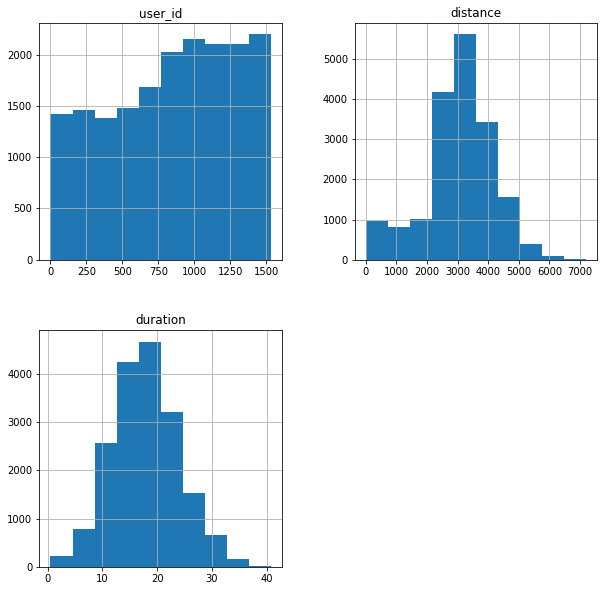

In [280]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике
data_rides.hist(figsize = (10, 10));

Датафрейм `data_rides` состоит из 4 столбцов и 18 068 строк. В датафрейме содержатся данные с типами object, float64 и int64. Количество ненулевых значений во всех столбцах также соответствует 18 068, поэтому и в этом случае предположим, что данные не содержат пропусков. Также не наблюдается особых выбросов. Названия столбцов соответствуют стилю snake_case.

Есть данные, у которых нужно изменить тип:

- cтолбец `date` имеет тип данных object, что необходимо будет преобразовать в тип `datetime` в ходе предобработки данных

<u>Датафрейм `Подписки` - `data_subscriptions`<u>

In [281]:
# Смотрим первые строки
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [282]:
# Выведем основную информацию о датафрейме `Подписки` - `data_subscriptions` с помощью метода info()
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Датафрейм `data_subscriptions` состоит из 4 столбцов и 2 строк, без пропусков и выбросов. В датафрейме находятся данные с типами object и int64. Названия столбцов соответствуют стилю snake_case.

#### Шаг 2. Предобработка данных

##### Корректировка типов данных столбцов

Как уже упоминалось выше, cтолбец `date` имеет тип данных `object`. Приведем этот столбец к типу datetime.

In [283]:
# Преобразуем столбец 'date' к типу данных datetime
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [284]:
# Проверим
data_rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

##### Добавление столбцов

Создадим новый столбец с номером месяца на основе столбца `date`.
Но сначала проверим, за какие годы предоставлены данные, поскольку если они за несколько лет, то разные годы могут попасть в один и тот же месяц

In [285]:
data_rides['date'].dt.year.unique()

array([2021])

Данные представлены только за один год, 2021. Можно указать номер месяца. 

In [286]:
# Создаем новый столбец с номером месяца на основе столбца date
data_rides['month'] = data_rides['date'].dt.month

In [287]:
# Проверяем
data_rides.sample(5)

,user_id,distance,duration,date,month
8734,867,2865.953213,17.115129,2021-11-20,11
4940,532,2923.890051,21.695560,2021-02-28,2
14838,1305,3529.061996,20.763540,2021-04-09,4
14094,1252,2804.068431,16.011624,2021-01-07,1
5592,596,3853.244156,17.247786,2021-08-04,8


##### Изучение и обработка пропущенных значений и дубликатов

<u>Пропуски<u>

In [288]:
# Проверим наличие пропусков в data_users
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [289]:
# Проверим наличие пропусков в data_rides
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [290]:
# Проверим наличие пропусков в data_subscriptions
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски отсутствуют во всех трех датафреймах.

<u>Дубликаты<u>

In [291]:
# Проверим наличие дубликатов в data_users
data_users.duplicated().sum()

31

Видим, что есть 31 явный дубликат.

In [292]:
data_users['user_id'].value_counts()

209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64

In [293]:
data_users[data_users['user_id'].duplicated(keep=False)]

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


Видим одинаковые строки с идентификатором пользователя 47. Посмотрим еще. 

In [294]:
# Посмотрим для примера строки с какими-нибудь еще одинаковыми идентификаторами
data_users.query('user_id == 108 or user_id == 1045')

,user_id,name,age,city,subscription_type
107,108,Влада,29,Тюмень,ultra
1044,1045,Артемий,28,Ростов-на-Дону,free
1549,108,Влада,29,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


Строки действительно идентичны. Нужно удалить дубликаты.

In [295]:
# Удалим дубликаты в data_users и сбросим индексы
data_users = data_users.drop_duplicates().reset_index(drop = True)

In [296]:
# Проверим
data_users.duplicated().sum()

0

Теперь дубликаты в `data_users` отсутствуют.

In [297]:
# Проверим наличие дубликатов в data_rides
data_rides.duplicated().sum()

0

Дубликаты в `data_rides` отсутствуют.

В `data_subscriptions` всего две строки, и визуально очевидно, что дубликатов нет. 

Итоги по предобработке данных:

- изменили тип данных в столбце `date` датафрейма `Поездки` - `data_rides` на `datetime` 
- обнаружили и удалили дубликаты в датафрейме `Пользователи` - `data_users`
- cоздали новый столбец с номером месяца на основе столбца `date` в датафрейме `Поездки` - `data_rides`

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [298]:
# Посмотрим города по количеству
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

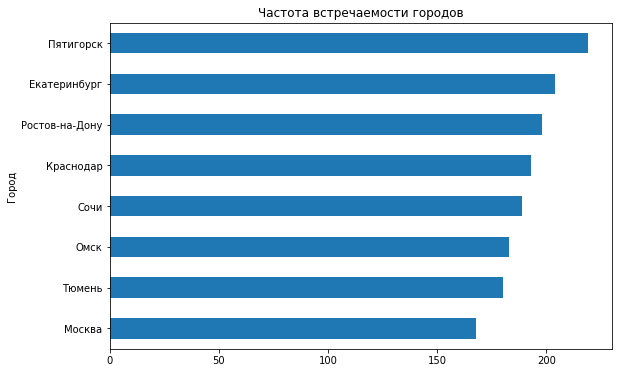

In [299]:
# Посмотрим на графике
data_users['city'].value_counts().sort_values() \
.plot(kind='barh',
      title='Частота встречаемости городов',
      xlabel='Город',
      ylabel='Количество',
      figsize=(9, 6));

Из полученных данных и диаграммы видно, что чаще всего встречается Пятигорск, затем Екатеринбург и Ростов-на-Дону. На последнем месте - Москва. В целом можно заметить, что южные города располагаются выше (за исключением Екатеринбурга, находящегося на 2-м месте), возможно, потому, что в более теплом климате больше возможностей для использования самокатов, и также сезон проката продолжается дольше. 

Посмотрим также структуру распределения пользователей по городам.

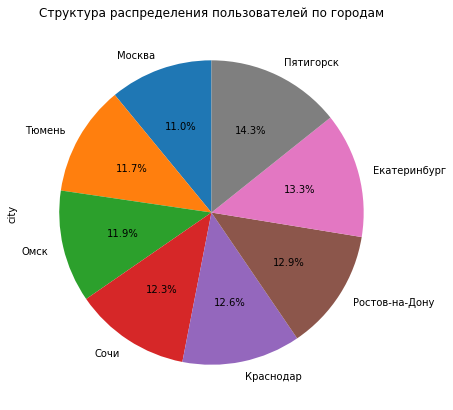

In [300]:
# Построим круговую диаграмму
data_users['city'].value_counts().sort_values() \
.plot(kind='pie',
      title='Структура распределения пользователей по городам',
      autopct='%1.1f%%',
      figsize=(7, 7),
      startangle=90);

Структура распределения достаточно равномерная: от самой большой доли 14,3% у Пятигорска до самой меньшей 11% у Москвы.  

Также ко всему вышесказанному можно добавить, что влияние на данные показатели, помимо климатических условий, может оказывать и размер города: в Пятигорске, который является не таким крупным населенным пунктом, как прочие, удобнее использовать самокат, чтобы куда-то добраться, чем, например, в Москве.

##### Соотношение пользователей с подпиской и без нее

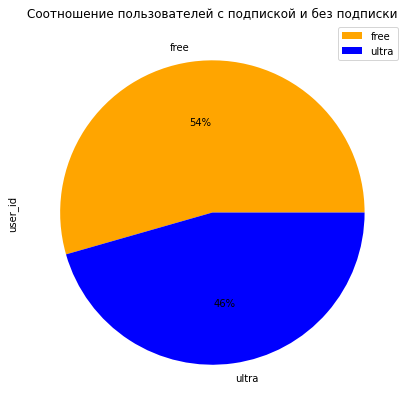

In [301]:
# Создадим сводную таблицу и на ее основе круговую диаграмму
data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count') \
.plot(kind='pie',
      title='Соотношение пользователей с подпиской и без подписки',
      y='user_id',      
      autopct='%1.0f%%',
      colors=['orange', 'blue'],
      figsize=(7, 7));
      

In [302]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Количество пользователей без подписки - 835, что составляет 54% от общего количества. Количество пользователей с подпиской Ultra - 699, что составляет 46% от общего количества. Соответственно, пользователей без подписки больше, чем пользователей с подпиской.

##### Возраст пользователей

In [303]:
# Посмотрим возраст пользователей
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

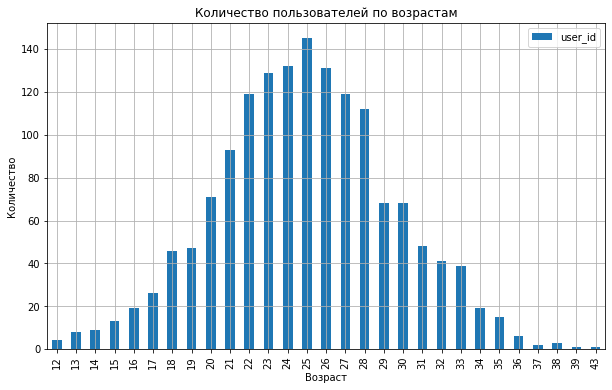

In [304]:
data_users.pivot_table(index='age', values='user_id', aggfunc='count') \
.plot(kind='bar',
      title='Количество пользователей по возрастам',
      grid=True,
      xlabel='Возраст',
      ylabel='Количество',
      figsize=(10, 6));

Услугами сервиса аренды самокатов GoFast пользуются люди в возрасте от 12 до 43 лет. Максимальное количество пользователей находится в возрасте 25 лет, этот же возраст является медианным. Средний возраст составляет 24,9 лет, что практически равно медианному возрасту 25 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

In [305]:
# Посмотрим общие сведения о расстоянии
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

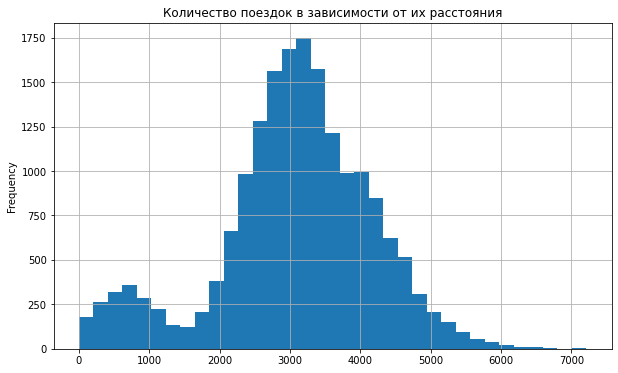

In [306]:
# Построим гистограмму
data_rides['distance'].plot(kind='hist',
                            title='Количество поездок в зависимости от их расстояния',
                            grid=True,
                            bins=35,
                            xlabel='Расстояние, м',
                            ylabel='Количество поездок',
                            figsize=(10, 6));

Мы видим, что за одну поездку пользователи преодолевают от 1 до 7211 м. Медианное значение составляет 3134 м, среднее - 3071 м, и они очень близки друг к другу. Наибольшее количество поездок было совершено на расстояние 2700-3500 метров. Также наблюдается всплеск - поездки на расстояние около 600 - 700 м, возможно, до станций метро или остановок наземного транспорта. Исходя из этого можно выделить такие типы поездок, как:
- когда самокат используется в качестве основного средства передвижения;
- когда самокат используется в качестве вспомогательного средства передвижения для того, чтобы добраться до основного транспорта. 

##### Продолжительность поездок

In [307]:
# Посмотрим общие сведения о продолжительности поездок
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

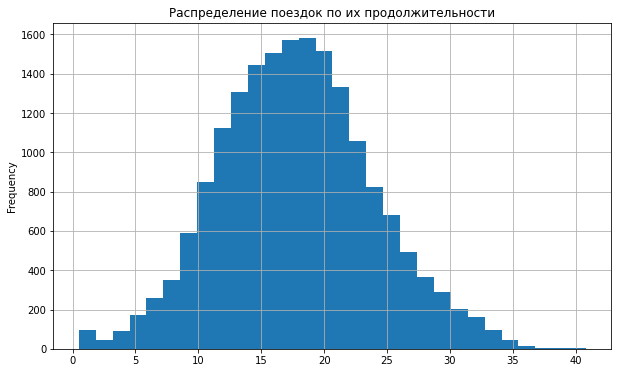

In [308]:
# Построим гистограмму
data_rides['duration'].plot(kind='hist',
                            title='Распределение поездок по их продолжительности',
                            grid=True,
                            bins=30,
                            xlabel='Продолжительность поездки, мин',
                            ylabel='Количество поездок',
                            figsize=(10, 6));

Продолжительность поездок нормально распределена от 0,5 мин (минимальное значение) до 40,8 мин (максимальное значение). В основном же длительность поездки составляет около 13 - 22 мин. Среднее значение продолжительности поездки составляет в 17,8 мин, медианное значение - 17,7 мин, они практически одинаковые.  
Самая длинная поездка составила 40,8 мин. Самые короткие поездки - по 0,5 мин, что выглядит достаточно странно. На гистограмме такие поездки выделяются в виде всплеска в количестве около 100. Возможно пользователи сразу после начала поездки передумали использовать самокат или же возникала техническая неисправность самоката.  
Посмотрим, что это за поездки.


In [309]:
data_rides.query('duration == 0.5')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [310]:
data_rides.query('duration == 0.5')['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

Видим, что было 95 поездок продолжительностью 0,5 мин. При этом получается, что за эти полминуты было преодолено расстояние в разных случаях от четырех с небольшим до семи тысяч метров, что совершенно невозможно. НО, если это ошибочные данные, и на самом деле продолжительность была не 0,5 мин, а 0,5 ч, тогда получается вполне логично: при скорости примерно от 8,2 до 14 км/ч можно проехать указанные расстояния за 0,5 ч. Очень вероятно, что в данном случае произошла ошибка ввода данных или ошибка фиксации времени.
Полагаю, что будет корректным исправить 0.5 мин на 30 мин.

In [311]:
data_rides['duration'] = data_rides['duration'].replace(0.5, 30)

In [312]:
# Проверим
data_rides.query('duration == 0.5')

,user_id,distance,duration,date,month


In [313]:
# Еще раз посмотрим общие сведения о продолжительности поездок
data_rides['duration'].describe()

count    18068.000000
mean        17.960120
std          6.023636
min          2.035632
25%         13.697117
50%         17.750643
75%         21.824361
max         40.823963
Name: duration, dtype: float64

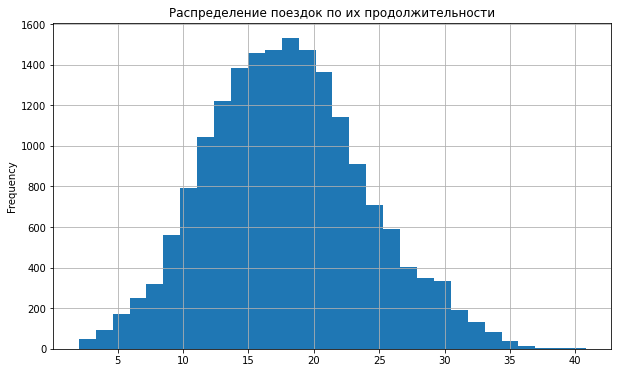

In [314]:
# и построим гистограмму
data_rides['duration'].plot(kind='hist',
                            title='Распределение поездок по их продолжительности',
                            grid=True,
                            bins=30,
                            xlabel='Продолжительность поездки, мин',
                            ylabel='Количество поездок',
                            figsize=(10, 6));

Теперь самые короткие поездки составляют 2 мин. Среднее значение немного изменилось - с 17,8 мин до 18 мин, медианное - с 17,7 мин до 17,8 мин. 

*Выводы по итогам исследовательского анализа:* 

- Чаще всего услугами сервиса аренды самокатов пользовались в Пятигорске, затем Екатеринбурге и Ростове-на-Дону. Реже всего - в Москве. В целом видно, что южные города располагаются выше (за исключением Екатеринбурга, находящегося на 2-м месте), возможно, потому, что в более теплом климате больше возможностей для использования самокатов, и также сезон проката продолжается дольше. Также, помимо климатических условий, важным может быть и размер города: в Пятигорске, который является не таким крупным населенным пунктом, как прочие, удобнее использовать самокат, чтобы куда-то добраться, чем, например, в Москве.

- Пользователей без подписки больше, чем пользователей с подпиской Ultra: количество пользователей без подписки составило 835, что представляет собой 54% от общего количества пользователей, а пользователей с подпиской - 699, что составляет 46% от общего количества.

- Услугами сервиса аренды самокатов GoFast пользуются люди в возрасте от 12 до 43 лет. Максимальное количество пользователей находится в возрасте 25 лет, этот же возраст является медианным. Средний возраст составляет 24,9 лет, что практически равно медианному возрасту 25 лет.  

- За одну поездку пользователи преодолевают от 1 до 7211 м. Медианное значение составляет 3134 м, среднее - 3071 м, и они очень близки друг к другу. Наибольшее количество поездок было совершено на расстояние 2700-3500 метров. Также наблюдается всплеск - поездки на расстояние около 600 - 700 м, возможно, до станций метро или остановок наземного транспорта. Исходя из этого можно выделить следующие типы поездок:

   - использование самоката как основного средства передвижения;
   - использование самоката в качестве вспомогательного средства передвижения для того, чтобы добраться до основного транспорта.  
   
- Продолжительность поездок согласно представленным данным нормально распределена от 0,5 мин (минимальное значение) до 40,8 мин (максимальное значение). В основном же длительность поездки составляла около 13 - 22 мин. Среднее значение продолжительности поездки составляло в 17,8 мин, медианное значение - 17,7 мин, они практически одинаковые.  
Самые короткие поездки - по 0,5 мин - выглядят странно. На гистограмме такие поездки выделяются в виде всплеска в количестве около 100. При более детальном изучении этих поездок выяснилось, что их было 95. При этом получается, что за эти полминуты было преодолено расстояние в разных случаях от четырех с небольшим до семи тысяч метров, что совершенно невозможно. Однако если это ошибка в данных, и на самом деле продолжительность была не 0,5 мин, а 0,5 ч, тогда получается вполне логично: при скорости примерно от 8,2 до 14 км/ч можно проехать указанные расстояния за 0,5 ч. Весьма вероятно, что в данном случае произошла ошибка ввода данных или ошибка фиксации времени. Поэтому значение 0.5 мин было исправлено на 30 мин. В результате среднее значение совсем немного изменилось - с 17,8 мин до 18 мин, медианное - с 17,7 мин до 17,8 мин.

#### Шаг 4. Объединение данных

 ##### Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()

In [315]:
# Объединим таблицы в один датафрейм
data = data_users.merge(data_rides).merge(data_subscriptions)
data.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
16662,1432,Федор,23,Тюмень,free,2619.528324,20.731761,2021-10-18,10,8,50,0
1888,205,Тимофей,26,Пятигорск,ultra,3476.820496,14.069967,2021-02-14,2,6,0,199
6151,659,Злата,27,Ростов-на-Дону,ultra,4907.951693,13.517039,2021-06-30,6,6,0,199
2955,317,Лариса,28,Москва,ultra,2927.050405,15.708202,2021-10-06,10,6,0,199
4069,438,Вероника,29,Екатеринбург,ultra,534.892463,5.674462,2021-03-24,3,6,0,199
8016,811,Маргарита,14,Сочи,free,814.487427,17.072437,2021-04-09,4,8,50,0
13990,1244,Ксения,23,Екатеринбург,free,2191.762778,10.921356,2021-10-10,10,8,50,0
4447,479,Эмиль,16,Ростов-на-Дону,ultra,3150.514837,24.752574,2021-09-01,9,6,0,199
4033,434,Дарья,21,Тюмень,ultra,3055.958044,11.731309,2021-12-14,12,6,0,199
16981,1458,Тамерлан,24,Сочи,free,5165.059611,33.838737,2021-06-25,6,8,50,0


In [316]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [317]:
data.duplicated().sum()

0

Созданный датафрейм `data` объединил таблицы `data_users`, `data_rides` и `data_subscriptions`. Он состоит из 18068 строк во всех столбцах, что соответствует исходной таблице `data_rides`, пропуски в столбцах отсутствуют. Дополнительно произведена проверка на явные дубликаты, которые тоже отсутствуют.

##### Создание двух датафреймов из датафрейма, созданного на предыдущем этапе:

- датафрейм с данными о пользователях без подписки

In [318]:
data_free = data.query('subscription_type == "free"')
data_free.head(7)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0


In [319]:
data_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


- датафрейм с данными о пользователях с подпиской

In [320]:
data_ultra = data.query('subscription_type == "ultra"')
data_ultra.head(7)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199


In [321]:
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

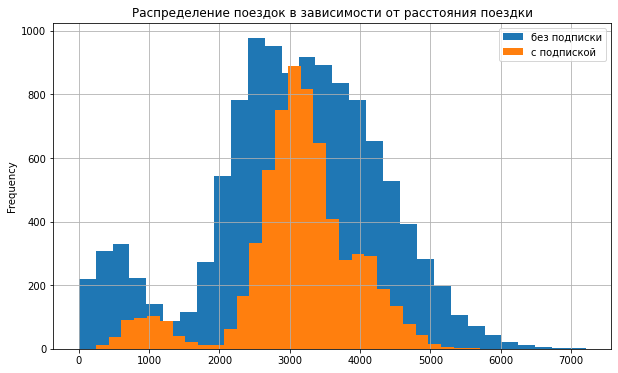

In [322]:
# Информация о расстоянии поездок для пользователей обеих категорий
data_free['distance'].plot(kind='hist', 
                           title = 'Распределение поездок в зависимости от расстояния поездки', 
                           xlabel = 'Расстояние, м', 
                           ylabel = 'Количество поездок',
                           figsize = (10,6),
                           bins=30,
                           grid=True,
                           label='без подписки');
data_ultra['distance'].plot(kind='hist', 
                           title = 'Распределение поездок в зависимости от расстояния поездки', 
                           xlabel = 'Расстояние, м', 
                           ylabel = 'Количество поездок',
                           figsize = (10,6),
                           bins=30,
                           grid=True,
                           label='с подпиской');
plt.legend(loc='upper right');

In [323]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [324]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Общее количество поездок пользователей без подписки (11568) на 5068 больше, чем количество поездок пользователей с подпиской `ultra`(6500).
Данные описательной статистики говорят о том, что медианное значение расстояния поездок пользователей без подписки составляет 3115 м, а с подпиской 3149 м. Средние значения: без подписки - 3045 м, с подпиской - 3115 м. Стандартное отклонение по поездкам с подпиской - 836 м, и оно меньше, чем по поездкам без подписки - 1246 м.  
Максимальное расстояние больше для поездок без подписки - 7211 м против 5700 м для поездок с подпиской.

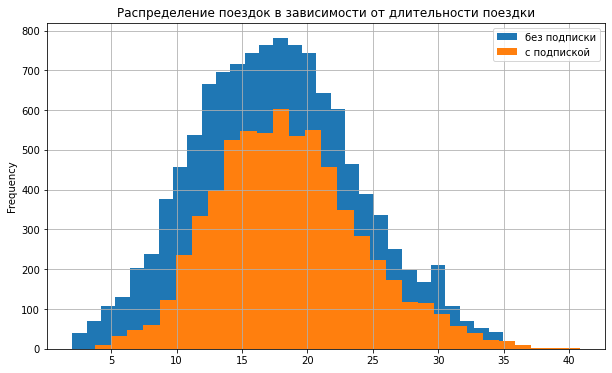

In [325]:
# Информация о времени поездок для пользователей обеих категорий
data_free['duration'].plot(kind='hist', 
                           title = 'Распределение поездок в зависимости от длительности поездки', 
                           xlabel = 'Длительность поездки, мин', 
                           ylabel = 'Количество поездок',
                           figsize = (10,6),
                           bins=30,
                           grid=True,
                           label='без подписки');
data_ultra['duration'].plot(kind='hist', 
                           title = 'Распределение поездок в зависимости от длительности поездки', 
                           xlabel = 'Длительность поездки, мин', 
                           ylabel = 'Количество поездок',
                           figsize = (10,6),
                           bins=30,
                           grid=True,
                           label='с подпиской');
plt.legend(loc='upper right');

У пользователей без подписки есть всплеск на 30 мин. Видимо, это те поездки, которые изначально были указаны с продолжительностью 0,5 мин и которые были откорректированы на 30 мин. И все они оказались у пользователей без подписки.  
Посмотрим этот момент.

In [328]:
data_free.query('duration == 30')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6531,701,Иван,31,Екатеринбург,free,4196.445201,30.0,2021-08-31,8,8,50,0
6570,704,Мирон,29,Ростов-на-Дону,free,4830.824371,30.0,2021-10-14,10,8,50,0
6680,712,Дарья,28,Москва,free,4684.004397,30.0,2021-03-04,3,8,50,0
6695,713,Святослав,30,Краснодар,free,5215.642710,30.0,2021-02-25,2,8,50,0
6768,718,Владислава,31,Москва,free,5197.436649,30.0,2021-02-11,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17004,1460,Жанна,27,Пятигорск,free,5531.335845,30.0,2021-01-19,1,8,50,0
17242,1477,Ян,17,Сочи,free,6724.932981,30.0,2021-01-12,1,8,50,0
17314,1483,Роберт,26,Екатеринбург,free,4445.481070,30.0,2021-03-06,3,8,50,0
17505,1496,Яна,19,Москва,free,5722.551787,30.0,2021-02-14,2,8,50,0


In [329]:
data_ultra.query('duration == 30')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee


Видим, что это 95 поездок с теми же идентификаторами, т.е., они действительно все оказались у пользователей без подписки. У пользователей же с подпиской поездок с такой продолжительностью нет.

In [330]:
data_free['duration'].describe()

count    11568.000000
mean        17.633172
std          6.239577
min          2.035632
25%         13.127082
50%         17.446822
75%         21.779484
max         34.948498
Name: duration, dtype: float64

In [331]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Видим, что медианное значение продолжительности поездок пользователей без подписки составляет 17,4 мин, а с подпиской - 18,2 мин. Средние значения: без подписки - 17,6 мин, с подпиской - 18,5 мин. Минимальное время поездок без подписки и с подпиской составляет 2 мин и 3,7 мин соответственно, а максимальное - 34,9 мин без подписки и 40,8 мин с подпиской.
Таким образом, продолжительность поездок без подписки немного ниже по всем показателям, чем при использовании подписки `ultra`. 

*Вывод по визуализации информации о расстоянии и времени поездок для пользователей без подписки и с подпиской `ultra`:*  

Общее количество поездок пользователей без подписки больше, чем количество поездок пользователей с подпиской ultra. Медианное значение расстояния поездок пользователей без подписки составляет 3115 м, а с подпиской 3149 м. Средние значения: без подписки - 3045 м, с подпиской - 3115 м. Максимальное расстояние больше для поездок без подписки - 7211 м против 5700 м для поездок с подпиской. При этом можно видеть, что у пользователей с подпиской меньший разброс (что заметно из графиков и по стандартному отклонению: без подписки - 1246,17, с подпиской `ultra` - 836,90), также наблюдается сдвиг центра того небольшого пика, о котором говорилось в п. 3.5 `Продолжительность поездок` с примерно 500 м (без подписки) до 1000 м (ultra). 
Что касается продолжительности поездок, то она по всем показателям у поездок без подписки несколько ниже, чем у поездок по подписке: медианные значения - 17,4 мин и 18,2 мин; средние значения - 17,6 мин и 18,5 мин; минимальное время поездок - 2 мин и 3,7 мин, максимальное - 34,9 мин и 40,8 мин. 
Исходя из данной информации, можно сказать, что наличие/отсутствие подписки влияет на длительность и расстояние.


#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными о поездках  
##### Добавление столбца с помесячной выручкой, которую принес каждый пользователь

In [332]:
# Сначала округлим продолжительность каждой поездки до следующего целого числа: 
data['duration'] = np.ceil(data['duration']) 

In [333]:
data_agg = data.pivot_table(index = ('user_id','month'),
                 values = ('distance', 'duration', 'minute_price','start_ride_price','subscription_fee'), 
                 aggfunc = {'distance':['count','sum'], 
                            'duration':'sum',
                            'minute_price': 'mean',
                            'start_ride_price':'mean',
                            'subscription_fee':'mean'}
                 )

# Переименуем столбцы
data_agg.columns = ['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']

# Выведем первые строки
data_agg.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

In [334]:
# Добавим столбец с помесячной выручкой, которую принёс каждый пользователь
data_agg['revenue_monthly'] = (data_agg['start_ride_price'] * data_agg['count']
                        + data_agg['minute_price'] * data_agg['duration'] + data_agg['subscription_fee'])
data_agg.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   

               subscription_fee  revenue_monthly  
user_id month                                     
1       1                   199            451.0  
        4                   199            241.0  
        8                   199            475.0  
        10                  199            391.0  
        11                  199            535.0  
        12                  199            367.0  
2       3                   199            577.0  
        4                   199            439.0  
        6                   199            283.0  
        7                   199            487.0

Был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.  

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Важно понять, тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. Проверим гипотезу.  

- H0: Пользователи с подпиской тратят на поездки столько же времени, сколько пользователи без подписки (иными словами - средняя продолжительность поездок пользователей с подпиской и пользователей без подписки равны)  
- Н1: Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки (средняя продолжительность поездок пользователей с подпиской больше, чем у пользователей без подписки)


In [355]:
print('Среднее время поездок пользователей c подпиской:', data_ultra['duration'].mean())
print('Среднее время поездок пользователей без подписки:', data_free['duration'].mean())

# выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время поездок пользователей c подпиской: 18.54198516280583
Среднее время поездок пользователей без подписки: 17.6331724383597
p-значение: 9.65242247012189e-23
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, можно предположить, что длительность поездок у пользователей с подпиской больше, чем у пользователей без подписки; есть основания утверждать, что средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок без подписки при установленном уровне значимости в 5 %.

In [348]:
print('Среднее время поездок пользователей c подпиской:', data_ultra['duration'].mean())
print('Среднее время поездок пользователей без подписки:', data_free['duration'].mean())

# выбранный уровень статистической значимости
alpha = 0.01

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время поездок пользователей c подпиской: 18.54198516280583
Среднее время поездок пользователей без подписки: 17.6331724383597
p-значение: 9.65242247012189e-23
Отвергаем нулевую гипотезу


##### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу:

- Н0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно оптимальному расстоянию 3130 метров
- Н1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше оптимального растояния 3130 метров

In [351]:
print('Среднее расстояние поездок пользователей c подпиской:', data_ultra['distance'].mean())

# выбранный уровень статистической значимости
alpha = 0.05

value = 3130

results = st.ttest_1samp(
    data_ultra['distance'],
    value,
    alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее расстояние поездок пользователей c подпиской: 3115.4453880370247
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Нулевая гипотеза не отвергается и, следовательно, есть основания утверждать, что среднее расстояние поездок пользователей с подпиской не превышает оптимальное с точки зрения износа самоката расстояние в 3130 метров при установленном уровне значимости в 5 %.  

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? 

Проверим гипотезу:

Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки  
Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки

In [356]:
print('Средняя помесячная выручка от пользователей c подпиской:', data_agg.query('subscription_fee == 199') \
    ['revenue_monthly'].mean())
print('Средняя помесячная выручка от пользователей без подписки:', data_agg.query('subscription_fee == 0') \
    ['revenue_monthly'].mean())

# выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    data_agg.query('subscription_fee == 199') \
    ['revenue_monthly'], 
    data_agg.query('subscription_fee == 0') \
    ['revenue_monthly'], 
    alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя помесячная выручка от пользователей c подпиской: 362.7921906022502
Средняя помесячная выручка от пользователей без подписки: 331.88349514563106
p-значение: 7.430720991422216e-26
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Есть основания предполагать, что средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки, при установленном уровне значимости в 5 %.

##### Каким тестом проверить гипотезу о значимом снижении количества пользовательских обращений в техподдержку после обновления сервиса, с которым взаимодействует мобильное приложение?

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нужен для проверки этой гипотезы?

**Ответ:**  

В данном случае будет анализироваться одна генеральная совокупность, с которой произошли некоторые изменения. В этой ситуации проверяется, равны ли средние значения до и после изменения.  

Выборки в этом случае будут зависимыми, иначе - парными, что означает, что некоторая переменная измеряется дважды для одних и тех же объектов (количество обращений до обновления и после него).  
Чтобы проверить гипозу о равенстве среднего генеральной совокупности для зависимых (парных) выборок, можно применить метод `scipy.stats.ttest_rel()`  

Ему достаточно передать два параметра: наборы данных до обновления и после, alternative='greater' — проверяется правосторонняя гипотеза:
H0: средние значения до и после изменения равны  
H1: правосторонняя альтернативная гипотеза о том, что среднее до изменения больше, чем среднее после изменения.  

Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.  
Подразумевается, что порядок объектов, для которых сделаны измерения, в обоих массивах тоже одинаковый.

*Вывод по проверке гипотез:*

- Нулевая гипотеза о том, что пользователи с подпиской тратят на поездки столько же времени, сколько пользователи без подписки (средняя продолжительность поездок пользователей с подпиской и пользователей без подписки равны) отвергнута. Можно предположить, что длительность поездок у пользователей с подпиской больше, чем у пользователей без подписки; есть основания утверждать, что средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок без подписки при установленном уровне значимости в 5 %.

- Нулевая гипотеза о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно оптимальному расстоянию 3130 метров, не отвергается, и, следовательно, можно полагать, что среднее расстояние поездок пользователей с подпиской не превышает оптимальное с точки зрения износа самоката расстояние в 3130 метров при установленном уровне значимости в 5 %. 

- Нулевая гипотеза о том, что помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки, отвергнута. Есть основания предполагать, что средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки, при установленном уровне значимости в 5 %. 

Приведено пояснение о применения метода `scipy.stats.ttest_rel()` для проверки гипотезы о равенстве средних для зависимых (парных) выборок, а именно, чтобы проверить гипотезу о значимом снижении количества пользовательских обращений в техподдержку после обновления сервиса, с которым взаимодействует мобильное приложение. 

#### Шаг 7. Распределения

7.1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть, по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей.  
Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%; подобрать параметры распределения, описывающего эту ситуацию; построить график распределения и сформулировать ответ на вопрос о количестве промокодов.

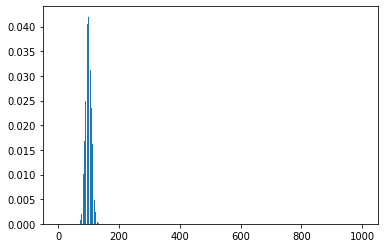

In [362]:
n = 1000
p = 0.1

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr);

In [361]:
n = 1000
p = 0.1
k = 100 

while binom.cdf(k-1, n, p) > 0.05:
    n += 1

print(f'Минимальное количество промокодов: {n}')


Минимальное количество промокодов: 1161


Вывод: Минимальное количество промокодов, которые нужно разослать, чтобы вероятность не выполнить план (как минимум 100 существующих клиентов должны продлить подписку) была примерно 5%, составляет 1161.

7.2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации нужно построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

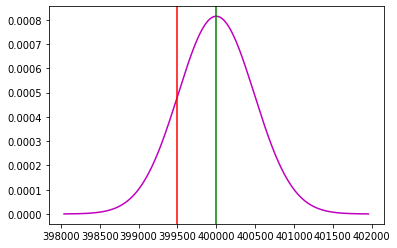

Вероятность, что уведомление откроют не более 399,5 тыс. пользователей: 0.1537


In [381]:
# Аппроксимируем биномиальное распределение нормальным
# задаём параметры биномиального распределения
n = 1000000
p = 0.4
k = 399500

# возьмем мат.ожидание и станд.отклонение нормального распределения равными
# мат.ожиданию и станд.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma)

# считаем вероятность получить значение, равное 399500 или меньше (т.е., "хвоста" слева от 399500)
result = distr.cdf(k)

# Построение графика
arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma)        
        )
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'm-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

print('Вероятность, что уведомление откроют не более 399,5 тыс. пользователей:', result.round(4))

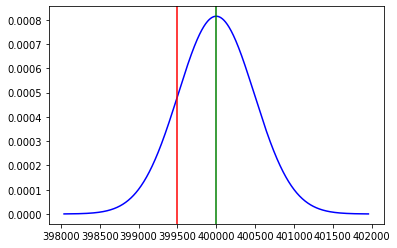

In [383]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()